# Medical Insurance Cost Prediction

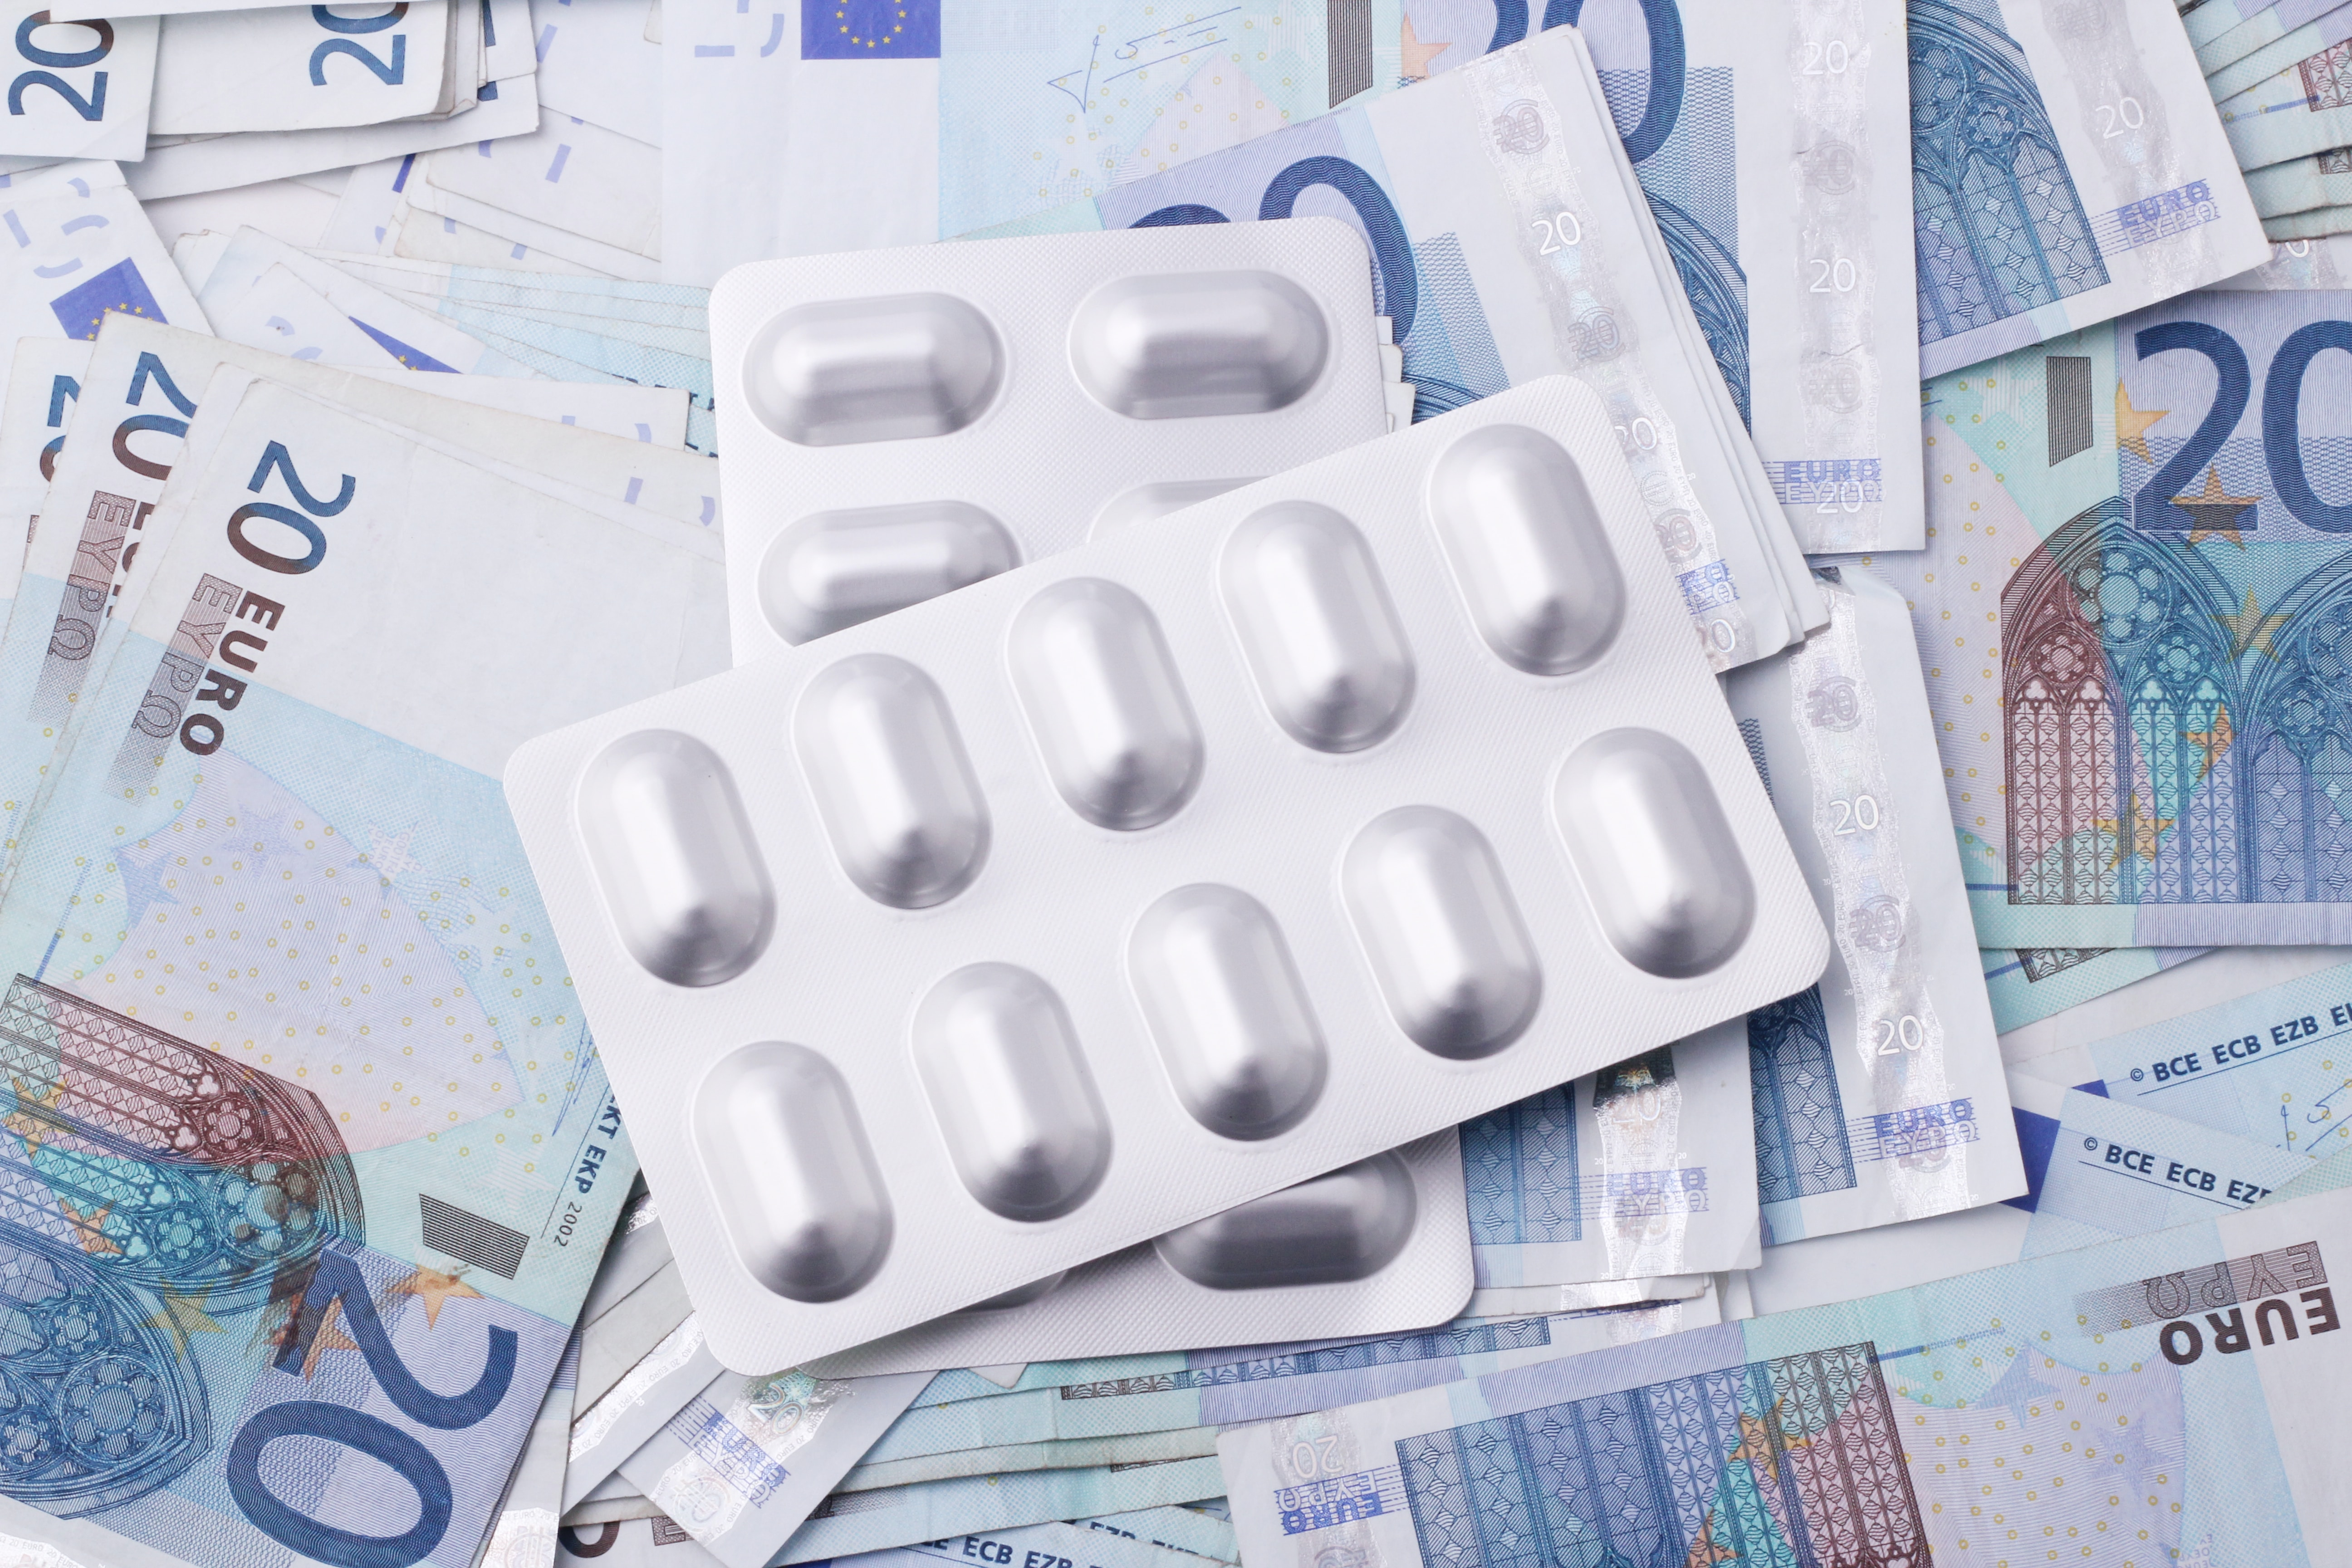

-----

The aim of this project is to analyze the given dataset and make a machine learning model for cost prediction

The dataset for this project is from [Akashdeep](https://github.com/akashdeep364/Medical-Insurance-Cost-Prediction/tree/main)

## Notebook contect
---
**Step 1**: Install and import necessary libraries  
**Step 2**: Reading and exploring data  
**Step 3**: Data cleaning   
**Step 4**: Descriptive Statistics  
**Step 5**: Data Analysis and visualization  
**Step 6**: Predictive models  

-----

## Step 1 : Install and import necessary libraries

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn
# !pip install sklearn

In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

## Step 2: Reading and exploring data

In [3]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Body mass index (BMI) is a a simple way to assess if a person has a healthy body weight for their height. It's calculated by dividing a person's weight in kilograms by the square of their height in meters.

Here is a breakdown of the different BMI categories for adults:

- Underweight: BMI below 18.5
- Normal weight: BMI of 18.5 to 24.9
- Overweight: BMI of 25 to 29.9
- Obese: BMI of 30 or higher


In [4]:
# Lets look at the number od rows and columns in our dataset

print(f'Our dataset consists of {insurance_df.shape[0]} rows and {insurance_df.shape[1]} columns')
print(f"------------------------------------------------")
print(f"------------------------------------------------")

Our dataset consists of 1338 rows and 7 columns
------------------------------------------------
------------------------------------------------


In [5]:
# Lets look at a concise summary of our dataset

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


---
By looking at the dtype we can determine that our dataset has categorical and numerical features

Catergorical features include:  
- Sex  
- Smoker  
- Region  

Numerical features include:  
- Age
- BMI
- Children
- Charges


## Step 3: Data Cleaning

In [6]:
# check for null values 

insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# check for duplicate values

insurance_df.duplicated().any()

True

In [8]:
# Find the duplicate value that shows up for charges and bmi

duplicate = insurance_df.loc[insurance_df.duplicated(subset = ["charges", "bmi"]),"charges"].unique()
duplicate

array([1639.5631])

In [9]:
# verifying all data for duplicate charge

duplicated_data =  insurance_df.loc[insurance_df["charges"] == 1639.5631]
duplicated_data

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# create a clean dataframe by droppping duplicate row

clean_df = insurance_df[insurance_df["charges"].isin(duplicate) == False]
clean_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Verify if data is clean

clean_df.duplicated().any()

False

## Step 4: Descriptive Statistics

In [12]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1336.0,39.237275,14.038678,18.0000,27.000000,39.00000,51.0000,64.00000
bmi,1336.0,30.663507,6.102752,15.9600,26.272500,30.38000,34.7000,53.13000
children,1336.0,1.096557,1.205650,0.0000,0.000000,1.00000,2.0000,5.00000
charges,1336.0,13287.833731,12110.702320,1121.8739,4746.875675,9388.75365,16687.3641,63770.42801


###  Plotting Numerical Features

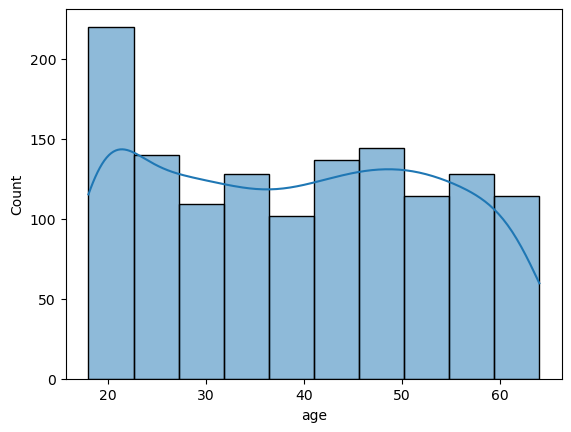

In [13]:
# age distribution

sns.histplot(clean_df["age"], kde = True, bins=10, stat="count")
plt.show()

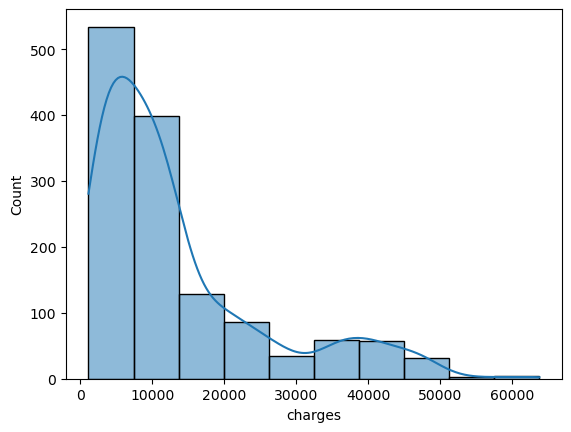

In [14]:
# charges distribution

sns.histplot(clean_df["charges"], kde = True, stat="count", bins=10)
plt.show()

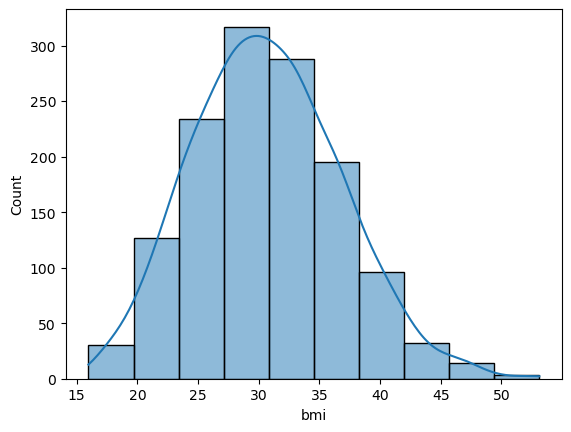

In [15]:
# bmi distribution

sns.histplot(clean_df["bmi"], kde = True, bins=10, stat="count")
plt.show()

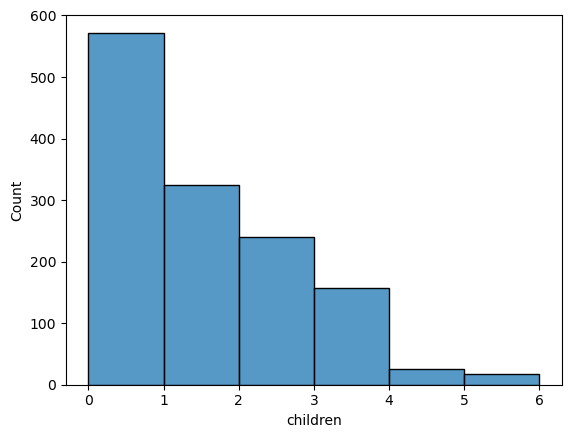

In [16]:
# number of children distribution

sns.histplot(clean_df["children"],bins = np.arange(clean_df["children"].nunique()+1))
plt.show()

### Plotting Categorical Features

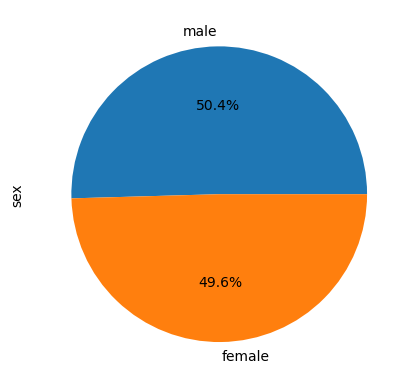

In [17]:
# distribution of male vs female 

clean_df["sex"].value_counts().plot(kind= "pie", autopct = "%1.1f%%")
plt.show()

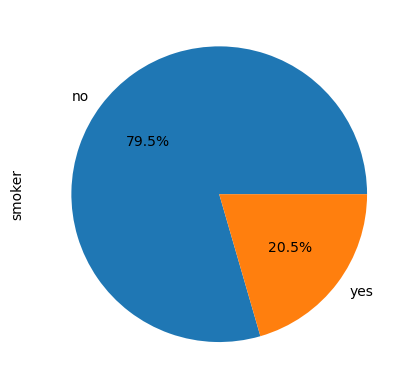

In [18]:
# distribution of smoker vs non-smoker

clean_df["smoker"].value_counts().plot(kind= "pie", autopct = "%1.1f%%")
plt.show()

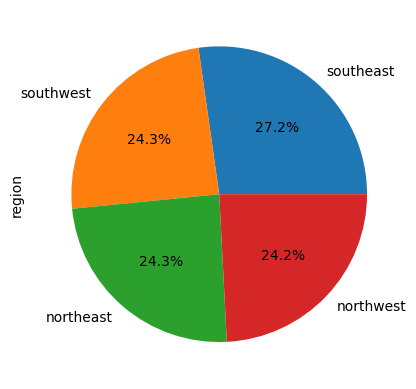

In [19]:
# distribution of different regions.

clean_df["region"].value_counts().plot(kind= "pie",autopct = "%1.1f%%")
plt.show()

### Data preprocessing
---
Encoding the categorical features

In [24]:
# encoding sex column

clean_df.replace({"sex" : {"male" : 0, "female" : 1}}, inplace = True)

# encoding sex column

clean_df.replace({"smoker" : {"yes" : 0, "no" : 1}}, inplace = True)

# # encoding sex column

clean_df.replace({"region":{"southeast" : 0,
                            "southwest" : 1,
                            "northeast" : 2,
                            "northwest" : 3}}, inplace = True)

In [21]:
# verify the dataframe

clean_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [22]:
ols_df = clean_df.copy()

### OLS Regression

In [23]:
X = ols_df.drop(columns="charges", axis = 1)
Y = ols_df["charges"]
X = sm.add_constant(X)

# Splitting the Features and Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state = 25)


lm = sm.OLS(Y_train, X_train)
model = lm.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     497.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.46e-295
Time:                        21:59:32   Log-Likelihood:                -10145.
No. Observations:                1002   AIC:                         2.030e+04
Df Residuals:                     995   BIC:                         2.034e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.112e+04   1298.454      8.561      0.0

### Linear Regression

In [61]:
linear_df = clean_df.copy()

X = linear_df.drop(columns="charges", axis=1)
y = linear_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state = 50)

In [62]:
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [63]:
prediction = reg.predict(X_test)

In [64]:
print(reg.coef_)

[   258.459889      319.83158966    342.83868416    474.7216079
 -23725.4481314     275.88590274]


In [65]:
import statsmodels.api as sm

In [88]:
r2 = reg.score(X_test, y_test)
r2 = round(r2*100,2)

In [95]:
print(f"{r2}%")

76.02%
